From the previous notebook, the features present in the dataset was not sufficient, and thus the macro avg was lower. So we now expand the features in the same dataset in order to increase the f1 score of the model.

In [28]:
# importing libraries
import pandas as pd
import numpy as np
import re

In [4]:
#reading dataset
df = pd.read_csv(r"E:\major_project\datasets\password_features.csv")

In [6]:
df.head()

,Unnamed: 0,password,length,bucket,strength,lowercase_count,uppercase_count,special_count,digit_count,has_special,has_digit,unique_chars,char_diversity,entropy,seq_letters,max_repeat
0,0,agus,4,0-4,1.0,4,0,0,4,0,1,4,2,2.0,0,1
1,1,roar,4,0-4,1.0,4,0,0,4,0,1,3,2,1.5,0,1
2,2,malz,4,0-4,1.0,4,0,0,4,0,1,4,2,2.0,0,1
3,3,cuba,4,0-4,1.0,4,0,0,4,0,1,4,2,2.0,0,1
4,4,pcms,4,0-4,1.0,4,0,0,4,0,1,4,2,2.0,0,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299661 entries, 0 to 299660
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       299661 non-null  int64  
 1   password         299661 non-null  object 
 2   length           299661 non-null  int64  
 3   bucket           299661 non-null  object 
 4   strength         299661 non-null  float64
 5   lowercase_count  299661 non-null  int64  
 6   uppercase_count  299661 non-null  int64  
 7   special_count    299661 non-null  int64  
 8   digit_count      299661 non-null  int64  
 9   has_special      299661 non-null  int64  
 10  has_digit        299661 non-null  int64  
 11  unique_chars     299661 non-null  int64  
 12  char_diversity   299661 non-null  int64  
 13  entropy          299661 non-null  float64
 14  seq_letters      299661 non-null  int64  
 15  max_repeat       299661 non-null  int64  
dtypes: float64(2), int64(12), object(2)
me

## Adding and updating features

From looking at previous notebook, I found a wrong logic while adding the column "digit_count" which counted alphabet instead of numbers. In this section, we will change it. Similarly, we will add additional features to supplement the model training.

In [11]:
#updating digit_count
df['digit_count'] = df["password"].str.count(r'[0-9]')

In [13]:
df

,Unnamed: 0,password,length,bucket,strength,lowercase_count,uppercase_count,special_count,digit_count,has_special,has_digit,unique_chars,char_diversity,entropy,seq_letters,max_repeat
0,0,agus,4,0-4,1.0,4,0,0,0,0,1,4,2,2.000000,0,1
1,1,roar,4,0-4,1.0,4,0,0,0,0,1,3,2,1.500000,0,1
2,2,malz,4,0-4,1.0,4,0,0,0,0,1,4,2,2.000000,0,1
3,3,cuba,4,0-4,1.0,4,0,0,0,0,1,4,2,2.000000,0,1
4,4,pcms,4,0-4,1.0,4,0,0,0,0,1,4,2,2.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299656,299995,changepassword___,17,17+,3.0,14,0,3,0,1,1,13,3,3.572469,1,3
299657,299996,stupidmotherfucker,18,17+,2.0,18,0,0,0,0,1,14,2,3.725481,1,1
299658,299997,luistekelounresto,17,17+,4.0,17,0,0,0,0,1,10,2,3.219528,0,1
299659,299998,themontles@yahoo.com,20,17+,4.0,18,0,2,0,1,1,13,3,3.521928,0,2


After correcting the digit_count, we will add ratio features ( divided by length), which is better for trees

In [16]:
##normalization for password containing certain digits
df["digit_ratio"] = df["digit_count"] / df["length"]

#normalized value for passwords with special characters
df["special_ratio"] = df["special_count"] / df["length"]

#normalized value for characters containing unique no. of characters((explained in notebook 2)
df["unique_ratio"] = df["unique_chars"] / df["length"]

#normalization of entropy
df["entropy_norm"]=df["entropy"]/df["length"]


In [18]:
df

,Unnamed: 0,password,length,bucket,strength,lowercase_count,uppercase_count,special_count,digit_count,has_special,has_digit,unique_chars,char_diversity,entropy,seq_letters,max_repeat,digit_ratio,special_ratio,unique_ratio,entropy_norm
0,0,agus,4,0-4,1.0,4,0,0,0,0,1,4,2,2.000000,0,1,0.000000,0.000000,1.000000,0.500000
1,1,roar,4,0-4,1.0,4,0,0,0,0,1,3,2,1.500000,0,1,0.000000,0.000000,0.750000,0.375000
2,2,malz,4,0-4,1.0,4,0,0,0,0,1,4,2,2.000000,0,1,0.000000,0.000000,1.000000,0.500000
3,3,cuba,4,0-4,1.0,4,0,0,0,0,1,4,2,2.000000,0,1,0.000000,0.000000,1.000000,0.500000
4,4,pcms,4,0-4,1.0,4,0,0,0,0,1,4,2,2.000000,0,1,0.000000,0.000000,1.000000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299656,299995,changepassword___,17,17+,3.0,14,0,3,0,1,1,13,3,3.572469,1,3,0.000000,0.176471,0.764706,0.210145
299657,299996,stupidmotherfucker,18,17+,2.0,18,0,0,0,0,1,14,2,3.725481,1,1,0.000000,0.000000,0.777778,0.206971
299658,299997,luistekelounresto,17,17+,4.0,17,0,0,0,0,1,10,2,3.219528,0,1,0.000000,0.000000,0.588235,0.189384
299659,299998,themontles@yahoo.com,20,17+,4.0,18,0,2,0,1,1,13,3,3.521928,0,2,0.000000,0.100000,0.650000,0.176096


In [20]:
#this is the reverse of seq_letters

def has_desc_sequence(x):
    x = x.lower()
    seqs = [
        'zyxwvutsrqponmlkjihgfedcba',
        '9876543210'
    ]
    for seq in seqs:
        for i in range(len(seq)-2):
            if seq[i:i+3] in x:
                return 1
    return 0

df["desc_seq"] = df["password"].apply(has_desc_sequence)


In [24]:
df['desc_seq'].value_counts()

desc_seq
0    294124
1      5537
Name: count, dtype: int64

In [38]:
#detecting use of year in password (e.g. adams2010)
#function returns an int of bool i.e. 0 or 1, depending if 19xx or 20xx matches in string x
def has_year(x):
    return int(bool(re.search(r'(19|20)\d{2}', x)))

df["has_year"] = df["password"].apply(has_year)


In [42]:
#checking if it worked
year_having_pass = df[df['has_year']>0]

In [40]:
year_having_pass

,Unnamed: 0,password,length,bucket,strength,lowercase_count,uppercase_count,special_count,digit_count,has_special,...,char_diversity,entropy,seq_letters,max_repeat,digit_ratio,special_ratio,unique_ratio,entropy_norm,desc_seq,has_year
74,74,1903,4,0-4,0.0,0,0,0,4,0,...,0,2.000000,0,1,1.000000,0.0,1.000000,0.500000,0,1
334,335,1980,4,0-4,0.0,0,0,0,4,0,...,0,2.000000,0,1,1.000000,0.0,1.000000,0.500000,0,1
421,423,2021,4,0-4,1.0,0,0,0,4,0,...,0,1.500000,0,1,1.000000,0.0,0.750000,0.375000,0,1
441,443,1901,4,0-4,0.0,0,0,0,4,0,...,0,1.500000,0,1,1.000000,0.0,0.750000,0.375000,0,1
690,692,2066,4,0-4,1.0,0,0,0,4,0,...,0,1.500000,0,2,1.000000,0.0,0.750000,0.375000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299620,299959,zapatosnegros1979,17,17+,4.0,13,0,0,4,0,...,2,3.616875,0,1,0.235294,0.0,0.764706,0.212757,0,1
299628,299967,masonandaustin1978,18,17+,4.0,14,0,0,4,0,...,2,3.530493,0,1,0.222222,0.0,0.722222,0.196139,0,1
299635,299974,yoselyn2059031789,17,17+,4.0,7,0,0,10,0,...,2,3.734522,1,1,0.588235,0.0,0.823529,0.219678,0,1
299646,299985,ngoomnohangoomnoha202010,24,17+,4.0,18,0,0,6,0,...,2,2.990602,1,2,0.250000,0.0,0.375000,0.124608,0,1


In [44]:
#this feature is to detect the presence of sustitutes such as adams -> @d@ms
def leet_count(x):
    return sum(c in "@$!0" for c in x)

df["leet_count"] = df["password"].apply(leet_count)


In [46]:
#this feature is added to detect passwords such as adams123, where there is a transistion of 1 (adams->1213)
def transitions(x):
    t = 0
    for i in range(len(x)-1):
        if x[i].isalpha() != x[i+1].isalpha():
            t += 1
    return t

df["transitions"] = df["password"].apply(transitions)


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299661 entries, 0 to 299660
Data columns (total 24 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       299661 non-null  int64  
 1   password         299661 non-null  object 
 2   length           299661 non-null  int64  
 3   bucket           299661 non-null  object 
 4   strength         299661 non-null  float64
 5   lowercase_count  299661 non-null  int64  
 6   uppercase_count  299661 non-null  int64  
 7   special_count    299661 non-null  int64  
 8   digit_count      299661 non-null  int64  
 9   has_special      299661 non-null  int64  
 10  has_digit        299661 non-null  int64  
 11  unique_chars     299661 non-null  int64  
 12  char_diversity   299661 non-null  int64  
 13  entropy          299661 non-null  float64
 14  seq_letters      299661 non-null  int64  
 15  max_repeat       299661 non-null  int64  
 16  digit_ratio      299661 non-null  floa

# Training Models

## Random Forest

In [80]:
#importing libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [60]:
# target
y = df['strength']

# features (drop non-numeric + target)
X = df.drop(columns=['password', 'bucket', 'strength'])

In [68]:
#splitting data before scaling
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2, # this is to split 20% data for testing
    random_state=42,
    stratify=y   # this is for class imbalance
)

In [70]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)


RandomForestClassifier(n_jobs=-1, random_state=42)

In [72]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.60      0.74       551
         1.0       0.85      0.60      0.71     20525
         2.0       0.66      0.72      0.69     19635
         3.0       0.55      0.72      0.62     12758
         4.0       0.68      0.75      0.71      6464

    accuracy                           0.68     59933
   macro avg       0.74      0.68      0.69     59933
weighted avg       0.71      0.68      0.68     59933



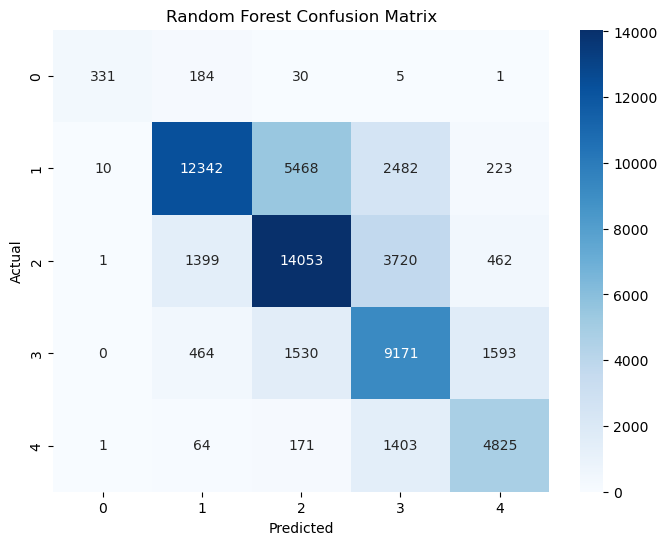

In [82]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

## XGBoost

In [99]:
from xgboost import XGBClassifier
import numpy as np

# Initializing the model
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,    
    max_depth=6,          
    objective='multi:softmax', 
    num_class=5,          # 0, 1, 2, 3, 4
    random_state=42,
    tree_method='hist',   # Fast histogram-based method
    n_jobs=-1
)

# Fitting the model with weights
xgb_model.fit(X_train, y_train)


y_pred_xgb = xgb_model.predict(X_test)

In [101]:
y_pred_xgb = xgb_model.predict(X_test)

print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

         0.0       0.99      0.60      0.75       551
         1.0       0.94      0.54      0.69     20525
         2.0       0.68      0.71      0.69     19635
         3.0       0.52      0.82      0.64     12758
         4.0       0.70      0.77      0.73      6464

    accuracy                           0.68     59933
   macro avg       0.77      0.69      0.70     59933
weighted avg       0.74      0.68      0.68     59933



In [105]:
pip install shap

INFO: pip is looking at multiple versions of numba to determine which version is compatible with other requirements. This could take a while.
  Using cached numpy-2.3.5-cp312-cp312-win_amd64.whl.metadata (60 kB)
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------------------------- ------------ 41.0/60.8 kB 960.0 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 803.2 kB/s eta 0:00:00
   ---------------------------------------- 0.0/549.3 kB ? eta -:--:--
   ------ --------------------------------- 92.2/549.3 kB 2.6 MB/s eta 0:00:01
   ------------- -------------------------- 184.3/549.3 kB 2.2 MB/s eta 0:00:01
   ------------------- -------------------- 266.2/549.3 kB 2.0 MB/s eta 0:00:01
   ---------------------------- ----------- 389.1/549.3 kB 2.2 MB/s eta 0:00:01
   ------------------------------------- -- 512.0/549.3 kB 2.3 MB/s eta 0:00:01
   ---------------------------------------- 549.3/549.3 kB 2.3 MB/s eta 0:00:00
   ---

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.2.6 which is incompatible.
pywavelets 1.5.0 requires numpy<2.0,>=1.22.4, but you have numpy 2.2.6 which is incompatible.
streamlit 1.32.0 requires numpy<2,>=1.19.3, but you have numpy 2.2.6 which is incompatible.


In [107]:
#to know which result is show and why, we will use SHAP
import shap

# Explain the model's predictions
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)

# Visualize the first prediction's explanation
shap.summary_plot(shap_values, X_test)

ImportError: 

IMPORTANT: PLEASE READ THIS FOR ADVICE ON HOW TO SOLVE THIS ISSUE!

Importing the numpy C-extensions failed. This error can happen for
many reasons, often due to issues with your setup or how NumPy was
installed.

We have compiled some common reasons and troubleshooting tips at:

    https://numpy.org/devdocs/user/troubleshooting-importerror.html

Please note and check the following:

  * The Python version is: Python3.12 from "E:\python\anaconda\installed\python.exe"
  * The NumPy version is: "1.26.4"

and make sure that they are the versions you expect.
Please carefully study the documentation linked above for further help.

Original error was: DLL load failed while importing _multiarray_umath: The specified module could not be found.


ImportError: numpy._core.multiarray failed to import